Note: This is the last homework I did last time I took the class (before I dropped). While I spent some time to try to do the problems again, I have borrowed some code from myself.

Problem 0:

The following is a figure from "Electric Field Effect in Atomically Thin Carbon Films" by Novoselov and Geim, et al. 2004 in Science. This is the paper where graphene was decisively shown to exist for the first time and resulted in a Nobel prize.

<img src="https://d2ufo47lrtsv5s.cloudfront.net/content/sci/306/5696/666/F2.large.jpg?width=800&height=600&carousel=1">

This figure shows the temperature dependent hall resistance and resistivity versus gate voltage. It also shows the conductivity versus gate voltage. It also shows the carrier density versus temperature. It also shows the band structure versus gate voltage.

The major story of the plot is that at low temperatures, the electric field effect in their carbon films (exfoliated by scotch tape) yields a V-shaped dependence of their conductivity with respect to gate voltage. This confirms that the carriers in their films are Dirac-Fermions which are characteristic of single layered graphene.

All in all, the figure is a pretty good figure, but there are a few shortcomings:

1.) The subfigure labels are all over the place. The data labels and figure indices are too crowded together.

2.) There is too much going on. I mean seriously, why does one need to plot conductivity AND resistivity on the same plot? They are recipricals - you only need to plot one. Band diagrams are dumped in without labelling or explanation, and there are 4 separate measurements some of which are sorted based on x-axis while some are not.

3.) The band diagrams are not labelled or explained.

4.) The carrier density versus temperature plot is not necessary here and could be plotted elsewhere.

To fix it, I would put the subfigure labels in a consistent location (like in my own figure below). I would remove the resistivity data leaving only conductivity data. I would reduce the clutter by either taking out the band diagrams or I would remove n vs T. Perhaps I would put these in a different figure.

Problem 1: Reproducing Plot from S. M. Gilbert, et al. "Fabrication of Subnanometer-Precision Nanopores in Hexagonal Boron Nitride". Scientific Reports. (2017). Figure 3j

I am plotting the inset. I addition to having an overlaid plot, I add two plots with linked panning and zooming to make the data clearer.

<img src="https://media.springernature.com/lw900/springer-static/image/art%3A10.1038%2Fs41598-017-12684-x/MediaObjects/41598_2017_12684_Fig3_HTML.jpg">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data1 = pd.read_csv('hw_2_data/data1.csv')
data2 = pd.read_csv('hw_2_data/data2.csv')

In [2]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.layouts import column, row
output_notebook()

TOOLS = 'crosshair,hover,pan,wheel_zoom,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select'

# Now I make 
x1 = data2['Dose(e/A2)'][:]
x2 = data2['Dose(e/A2)'][:]
y1 = data2['AreaPore1'][:]
y2 =data2['AreaPore2'][:]


s1 = figure(title="Defect Growth in Layers 1 and 2", plot_height=300, plot_width=900, tools = TOOLS, y_range=(0,2.5))
r1 = s1.line(x1, y1, color="red", line_width=3)
r2 = s1.line(x1, y2 , color ="blue", line_width = 2)


s3 = figure(title="Defect Growth in Layer 1", plot_height=300, plot_width=450, tools = TOOLS,  x_range=s1.x_range, y_range=s1.y_range)
r3 = s3.line(x1, y1, color="red", line_width=3)
r4 = s3.circle(x1, y1, color='red', size=20)



s2 = figure(title="Defect Growth in Layer 2", plot_height=300, plot_width=450, tools = TOOLS, x_range=s1.x_range, y_range=s1.y_range)
r5 = s2.line(x2, y2, color="blue", line_width=3)
r6 = s2.circle(x2, y2, size=20)

s1.xaxis.axis_label = 'Dose(e/A**2)'
s2.xaxis.axis_label = 'Dose(e/A**2)'
s3.xaxis.axis_label = 'Dose(e/A**2)'

s1.yaxis.axis_label = 'Area(nm**2)'
s2.yaxis.axis_label = 'Area(nm**2)'
s3.yaxis.axis_label = 'Area(nm**2)'


show(column(s1, row(s3,s2)), notebook_handle=True)

Loading BokehJS ...

Problem 2:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

google = np.loadtxt('hw_2_data/google_data.txt', skiprows=1)
yahoo =  np.loadtxt('hw_2_data/yahoo_data.txt', skiprows=1)
ny_temps = np.loadtxt('hw_2_data/ny_temps.txt', skiprows=1)

[None, None, None]

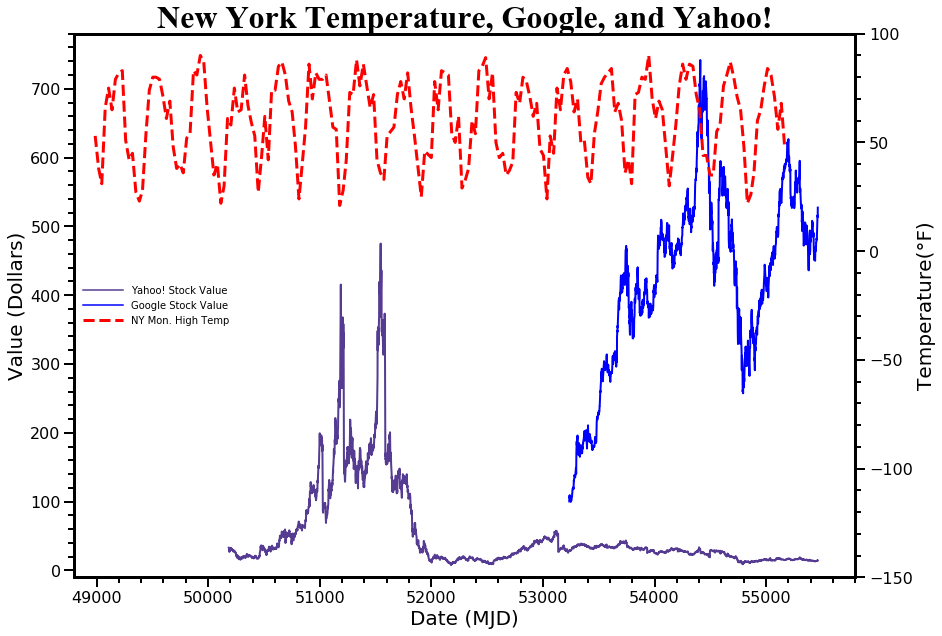

In [4]:
#first I set the default paramaters for matplotlib to match the figure before I generate the plot
plt.rcParams['axes.linewidth'] = 3
plt.rcParams["xtick.major.size"] =10
plt.rcParams["ytick.major.size"] =10
plt.rcParams["xtick.major.width"] =2
plt.rcParams["ytick.major.width"] =2
plt.rcParams["xtick.minor.size"] =6
plt.rcParams["ytick.minor.size"] =6
plt.rcParams["xtick.minor.width"] =2
plt.rcParams["ytick.minor.width"] =2
plt.rcParams['legend.handlelength'] = 4

#Now I generate the plot using subplot so I can continue modifying it

f, ax = plt.subplots(figsize=(14,10))

#I Set the axis tick marks

plt.minorticks_on()
plt.tick_params(axis='x', which='both',  top='off')


#Now I add the data
# First I plot yahoo and google
ax.plot(yahoo[:,0], yahoo[:,1], color = '#553b91' ,label='Yahoo! Stock Value')
ax.plot(google[:,0], google[:,1], color ='blue', label='Google Stock Value')
ax.plot(50000, 0,'--r', linewidth=3, label='NY Mon. High Temp')
ax.tick_params(labeltop='off')

#Then I create a second y-axis for the temperature

ax2 = ax.twinx()
ax2.plot(ny_temps[:,0],  ny_temps[:,1],'--r', linewidth=3, label='New York Temperature')
plt.minorticks_on()

#I plot and position the legend

ax.legend(loc='center left', framealpha=0)


# Now I write and format the text for labels and axes

ax.set_title( 'New York Temperature, Google, and Yahoo!', fontsize=32, fontweight='bold', family='times new roman')
ax.set_xlabel('Date (MJD)', fontsize=20)
ax.set_ylabel('Value (Dollars)', fontsize=20 )
ax2.set_ylabel('Temperature(°F)', fontsize=20)

#I set the axis limits

ax.set_xlim(48800,55800)
ax2.set_ylim(-150, 100)
ax.set_ylim(-10,780)




# Change the weight of the lines and axis labels

ax.tick_params(axis='both',labelsize=16)
ax2.tick_params(axis='both',labelsize=16)
plt.setp(ax.lines, linewidth=2)

Problem 3 - Brushing Extra Credit:

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd

from bokeh.io import output_file, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure

flowers=pd.read_csv('hw_2_data/flowers.csv' ,skiprows = 0)


In [6]:
y0 = flowers[flowers.columns[0]]
y1 = flowers[flowers.columns[1]]
y2 = flowers[flowers.columns[2]]
y3 = flowers[flowers.columns[3]]

# create a column data source for the plots to share
source = ColumnDataSource(data=dict(y0=y0, y1=y1, y2=y2, y3 = y3))

TOOLS = "box_select,lasso_select,help"

figures = dict()


for i in range (4):
    for j in range (4):
        

        
        figures[4*i+j] = figure(tools=TOOLS, plot_width=200, plot_height=200, title=None)
        figures[4*i+j].circle('y'+str(i), 'y'+str(j), source=source)

show( column(row(figures[0], figures[1], figures[2], figures[3]), row(figures[4], figures[5], figures[6], figures[7]), row(figures[8], figures[9], figures[10], figures[11]), row(figures[12], figures[13], figures[14], figures[15])), notebook_handle=True)
#show( row(figures[4], figures[5], figures[6], figures[7]), notebook_handle=True)
